In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('Data formatted.csv')
df['date'] = pd.to_datetime(df['date'])
df['date'].dt.strftime('%d-%m')

0      01-01
1      02-01
2      03-01
3      04-01
4      05-01
       ...  
245    02-09
246    03-09
247    04-09
248    05-09
249    06-09
Name: date, Length: 250, dtype: object

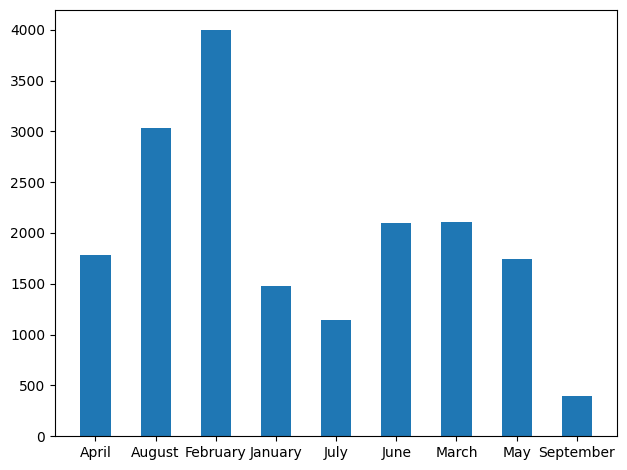

In [18]:
df['date'] = df['date'].dt.month_name()
# No gráfico deve ter o profit total total de cada mês.

total_by_month = df.groupby('date', as_index=False)['profit'].sum()

plt.bar(total_by_month['date'], total_by_month['profit'], width=0.5)
plt.tight_layout()




([<matplotlib.patches.Wedge at 0x21b7b0cfd90>,
 [Text(0.5036913874575006, 0.9779033624040456, 'Sul'),
  Text(-1.0953469340254427, 0.10106974879291429, 'Leste'),
  Text(-0.193571409138568, -1.0828342946010296, 'Oeste'),
  Text(0.9316788900014608, -0.5847858120078208, 'Norte')],
 [Text(0.2747407567950003, 0.5334018340385702, '35%'),
  Text(-0.5974619640138777, 0.055128953887044155, '27%'),
  Text(-0.10558440498467343, -0.5906368879641979, '20%'),
  Text(0.5081884854553421, -0.3189740792769931, '18%')])

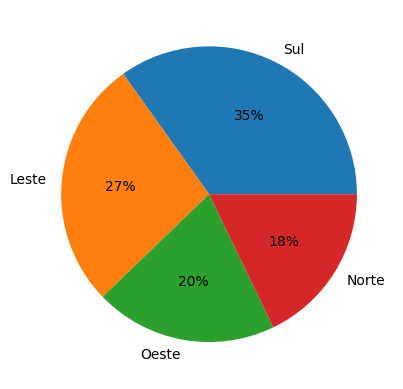

In [19]:
# Total de lucro por região.
region_total_profit = df.groupby('region')['profit'].sum().sort_values(ascending=False)

plt.pie(region_total_profit, labels=region_total_profit.index, autopct='%1.0f%%')

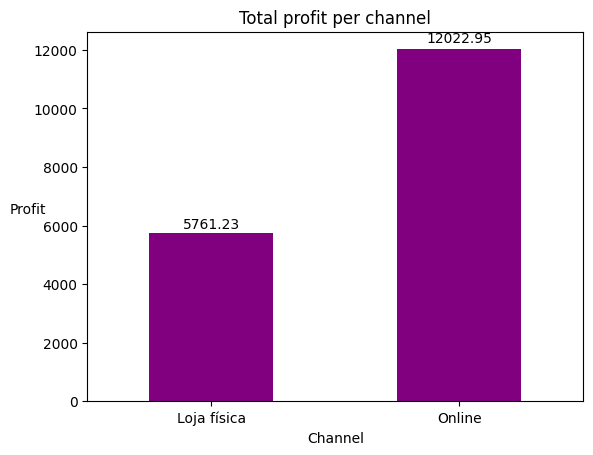

In [20]:
# Total de lucro por canal

# Agrupa os dados
channel_total_profit = df.groupby('channel')['profit'].sum()

# Cria o gráfico
ax = channel_total_profit.plot(kind='bar', color='purple', title='Total profit per channel')
ax.set_xlabel('Channel')
ax.set_ylabel('Profit', rotation=0)
ax.set_xticklabels(channel_total_profit.index, rotation=0)

for i, value in enumerate(channel_total_profit):
    ax.text(i, value + value * 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()



channel
Loja física    0.77%
Online         1.24%
dtype: object


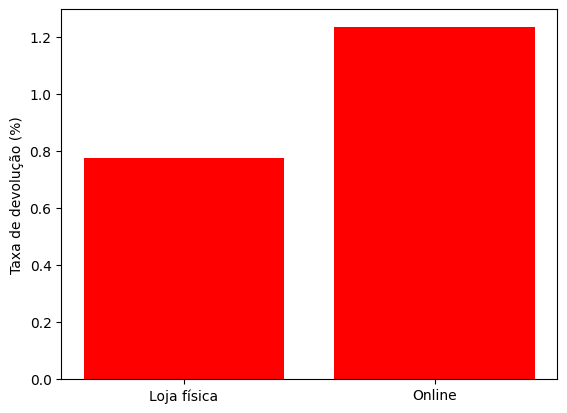

In [21]:
# Taxa de devolução

returned_values = df.query("returned == True").groupby('channel').size()
total_quantity = df.groupby('channel')['quantity'].sum()
return_rate = (returned_values / total_quantity) * 100

#Exibindo no terminal
return_rate_formatted = return_rate.map(lambda x: f'{x:.2f}%')

plt.ylabel('Taxa de devolução (%)')
plt.bar(return_rate_formatted.index, return_rate, color='red')



<BarContainer object of 5 artists>

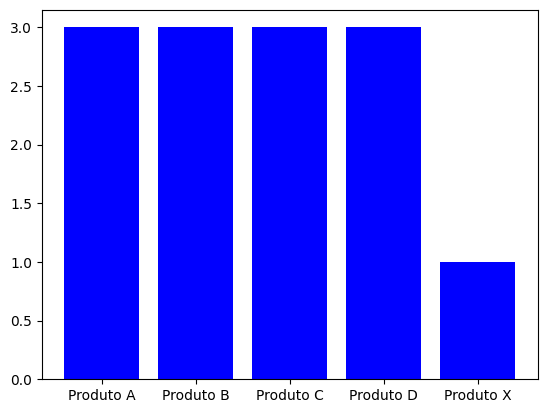

In [29]:
products_mean = df.groupby('product', as_index=False)['rating'].mean()
products_mean['rating'] = products_mean['rating']
products_mean['rating'] = products_mean['rating'].astype(int)
plt.bar(products_mean['product'], products_mean['rating'], color='blue')